# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number

>🔑 **Note:** Hyperparameter
* Input layer shape: Same shape as number of features(e.g. # bedrooms, # bathrooms, ...)
* Hidden layer(s): Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer: Problem specific, generally 10 to 100
* Output layer shape: Same shape as desired prediction shape
* Hidden activation: Usually ReLU
* Output activation: None, ReLU, tanh
* Loss function: MSE, MAE
* Optimizer: SGD, Adam, ...

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices("GPU")

2.6.3


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Creating some data to view and to fit

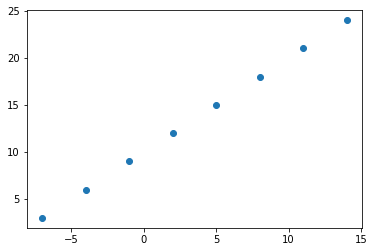

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24])

# Visualize
plt.scatter(X, y)

In [3]:
# This is the relationship our neural network should learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes


In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939_700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how ring it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrix (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)]) # This way we're adding Layers like in a list. We can also use `model.add`

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 966ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we tool to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might chagen the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild our model
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.SGD(),
    metrics = ["mae"])

# 3. Fit the model (train for longer this time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 140ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
X, y, y_pred

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[29.739855]], dtype=float32))

In [15]:
# Let's rebuild our model
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error of predicted values
    optimizer=tf.keras.optimizers.Adam(lr=0.01), # stochastic gradient descent
    metrics = ["mae"])

# 3. Fit the model (train for longer this time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

c:\Users\gutsc\anaconda3\envs\udemy_tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1/1 [==============================] - 0s 188ms/step - loss: 11.7683 - mae: 11.7683
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0964 - mae: 11.0964
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7211 - mae: 9.7211
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0105 - mae: 9.0105
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2779 - mae: 8.2779
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5200 - mae: 7.5200
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0674 - mae: 7.0674
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss:

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
X, y, y_pred

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[26.587622]], dtype=float32))

## Evaluating a model

In practive, a typical workflow you'll go through when build neural networks is:
`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...`

When it comes to evalution... ther are 3 words you should memorize:
>`Visualize, visualize, visualize:`

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [18]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

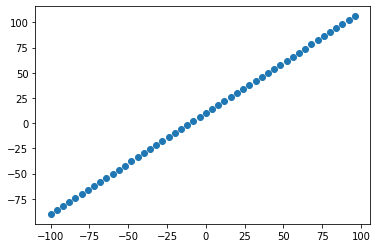

In [19]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [20]:
# Check the length of how many samples we have
len(X)

50

In [21]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are the training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # 20% of the data
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

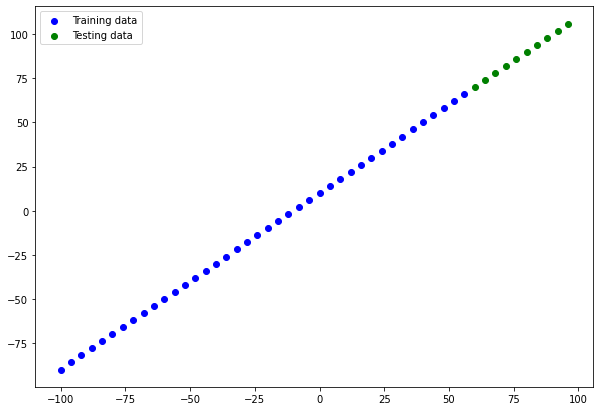

In [22]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="green", label="Testing data")
# show legend
plt.legend()

In [23]:
# Let's have a look at how to build a neural network four our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

# 2. Compile the mdoel
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 10.5273 - mae: 10.5273
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3906 - mae: 9.3906
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6292 - mae: 7.6292
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6859 - mae: 9.6859
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0740 - mae: 11.0740
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2264 - mae: 10.2264
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2347 - mae: 9.2347
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1547 - mae: 9.1547
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7875 - mae: 11.7875
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 13.7172 - mae: 13.7172
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - los

### Visualizing the model

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
    ], name="foo")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model.summary()

Model: "foo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned parameters from other models during **transfer learning**)

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.



In [26]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)
# Every time i fit the model without reinstantiating it, it updates the actual training model and fit it for another 100 times

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4042 - mae: 27.4042
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.6332 - mae: 24.6332
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 29.8924 - mae: 29.8924
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 27.3950 - mae: 27.3950
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.9435 - mae: 14.9435
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8821 - mae: 11.8821
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1915 - mae: 11.1915
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0898 - mae: 11.0898
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 40.4655 - mae: 40.4655
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8497 - mae: 27.8497
Epoch 11/100
2/2 [==============================] - 0s 3ms/

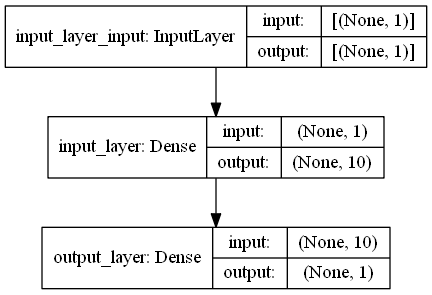

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus my model's predictions).

In [28]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 76.99388 ],
       [ 82.01411 ],
       [ 87.03434 ],
       [ 92.054565],
       [ 97.07481 ],
       [102.09503 ],
       [107.11526 ],
       [112.13549 ],
       [117.15572 ],
       [122.17595 ]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [30]:
# Let's create a plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred):
    
    """
    Plots training data, test data and compares predictions to gound truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot trainning data in blue
    plt.scatter(train_data, train_labels, c="blue", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="green", label="Test data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="red", label="Predictions")
    # Show the legend
    plt.legend()

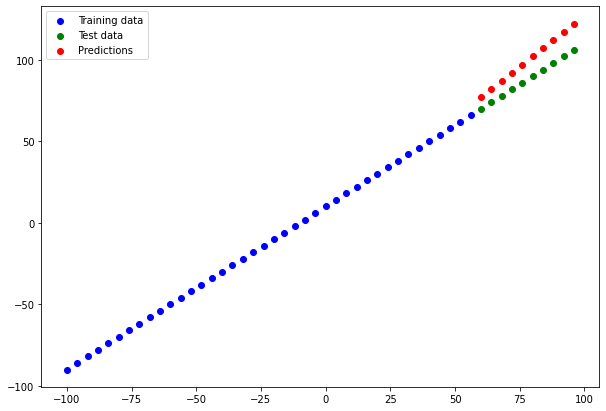

In [31]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred)

### Evaluatin our model's predictions with regression evaluation matrix

Depending on the problem you're working on, there will be different evaluation metrics to evluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error
* MSE - mean squared error


In [32]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 77ms/step - loss: 11.5849 - mae: 11.5849


[11.584915161132812, 11.584915161132812]

In [33]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true=y_test,
    y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.003672 , 10.797178 , 10.       , 10.410913 , 12.0299225,
       14.876025 , 19.115257 , 24.13549  , 29.155725 , 34.17595  ],
      dtype=float32)>

In [34]:
tf.constant(y_pred), y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 76.99388 ],
        [ 82.01411 ],
        [ 87.03434 ],
        [ 92.054565],
        [ 97.07481 ],
        [102.09503 ],
        [107.11526 ],
        [112.13549 ],
        [117.15572 ],
        [122.17595 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [35]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.99388 ,  82.01411 ,  87.03434 ,  92.054565,  97.07481 ,
       102.09503 , 107.11526 , 112.13549 , 117.15572 , 122.17595 ],
      dtype=float32)>

In [36]:
# Calculate the mae
mae = tf.metrics.mean_absolute_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.584915>

In [37]:
# Calculate the mse
mse = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=142.79744>

In [38]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiment to improve our model

```
Build a model -> fit it -> evluate it -> tweak it -> fit it -> evaluat it -> ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. MAke your mordel larger (using a more complex model) - this might come in the form of more layer or more hidden units in each layer.
3. Train for longer - give more model more of a chance ti find pattern in the data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. ...

**Build `model_1`**

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],)

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

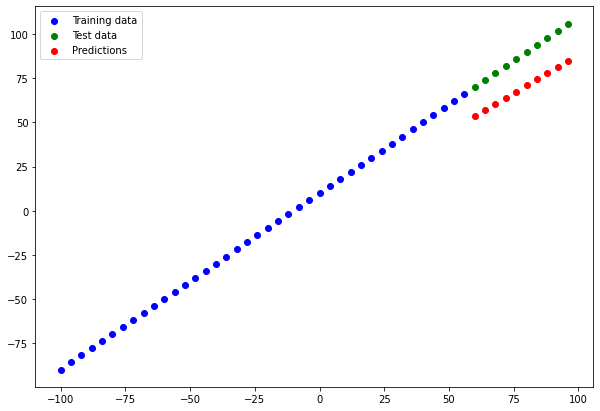

In [40]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [41]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

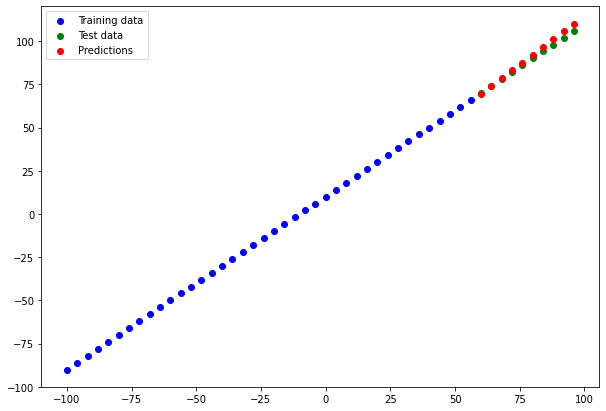

In [43]:
# Make and plot predictions
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [44]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9098037>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.459189>)

**Build `model_3`**
* 2 dense layers, trained for 500 epochs

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

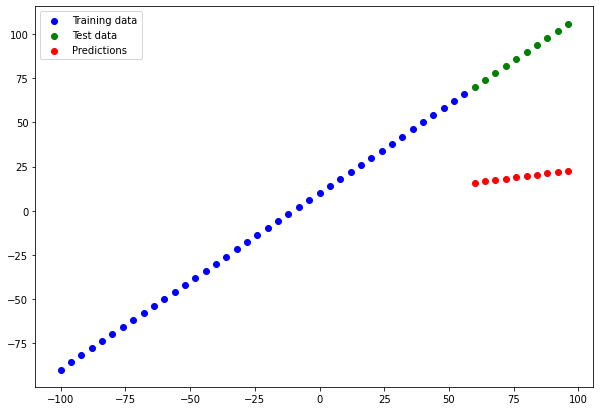

In [46]:
# Make and plot predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [47]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68787>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.4727>)

>🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [48]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.909804,5.459189
2,model_3,68.687866,4804.472656


Looks like model_2 performed the best

In [49]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of my main goals should be to minimize the time between my experiments. The  more experiments i do, the more things i'll figure out which don't work an in turn, get closer to figuring out what does work. Remember the machine learning practioner's mott: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of my experiments.

And when doing so, it can be tedious if i'm running lots of experiments.

Luckily, there are tools to help us!

>📖 **Ressource:** As i build more models, i'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (i'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)


## Saving our models

Saving our models allows us to use them outside of VS Code (or wherever they were trained) such as in a web application or a mobile app.

There are to main formats we can save our models too:
1. The SavedModel format
2. The HDF5 format

In [50]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [54]:
# Save model using the HDF5 format
from keras.models import load_model
model_2.save("best_model_HDF5_format.h5")
## TODO: #2 #1 Try with save method from other udemy course

ImportError: `save_model` requires h5py.

## Loading in a saved model

In [57]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds, loaded_SavedModel_format_preds, model_2_preds == loaded_SavedModel_format_preds

(array([[ 69.46719 ],
        [ 73.98569 ],
        [ 78.504166],
        [ 83.02265 ],
        [ 87.54114 ],
        [ 92.05962 ],
        [ 96.57811 ],
        [101.09659 ],
        [105.61508 ],
        [110.13356 ]], dtype=float32),
 array([[ 69.46719 ],
        [ 73.98569 ],
        [ 78.504166],
        [ 83.02265 ],
        [ 87.54114 ],
        [ 92.05962 ],
        [ 96.57811 ],
        [101.09659 ],
        [105.61508 ],
        [110.13356 ]], dtype=float32),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

### A larger example

In [62]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
# Let's try one-hot encode our DataFrane so it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [70]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [74]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [79]:
# Build neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.0889 - mae: 8637.0889
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7476 - mae: 7886.7476
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1616 - mae: 7558.1616
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7791.7866 - mae: 7791.7866
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.2188 - mae: 7748.2188
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7594.9863 - mae: 7594.9863
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.4282 - mae: 7589.4282
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.0161 - mae: 7698.0161
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.3296 - mae: 7496.3296
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7492.9463 - mae: 7492.9463

In [80]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7034.2998 - mae: 7034.2998


[7034.2998046875, 7034.2998046875]

Right now it looks like our model isn't performing to well... let's try to improve it.

To (try) improve our modell, we will run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer (like above but longer)
3. ...

In [86]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13273.1592 - mae: 13273.1592
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4316 - mae: 13104.4316
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5342 - mae: 12749.5342
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7529 - mae: 12055.7529
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8193 - mae: 10905.8193
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7295 - mae: 9457.7295
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6880 - mae: 8147.6880
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8633 - mae: 7528.8633
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1792 - mae: 7429.1792
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0903 - mae:

In [87]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4921.6938 - mae: 4921.6938


[4921.69384765625, 4921.69384765625]

In [91]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

# 4. Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3489.6953 - mae: 3489.6953


[3489.6953125, 3489.6953125]

Text(0.5, 0, 'epochs')

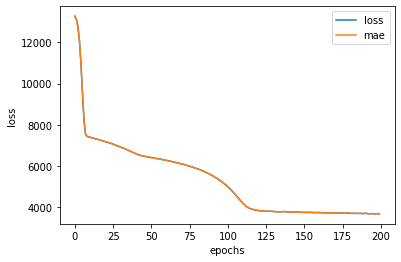

In [92]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

>❓**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before. TensorFlow has a solution! It's called the [early stopping callback](https://keras.io/api/callbacks/early_stopping/), which is a TensorFLow component you can add to your model to stop training once it stops improving a certain metric.

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

[Why scale?](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [112]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
# Zunächst nur auf Trainingsdaten fitten! Andernfalls würde man Daten "aus der Zukunft" bei trainieren berücksichtigen
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [113]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [117]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [118]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes.

In [121]:
# Build a neural network model to fit our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Build the model
insurance_model_normalized = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model_normalized.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"])

# 3. Fit the model
history = insurance_model_normalized.fit(X_train_normal, y_train, epochs=200, verbose=0)

# 4. Evaluate the model
insurance_model_normalized.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3171.4541 - mae: 3171.4541


[3171.4541015625, 3171.4541015625]

Text(0.5, 0, 'epochs')

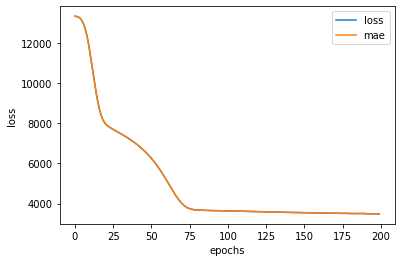

In [122]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")